In [5]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [13]:
data=pd.read_csv('data/mushrooms.csv')

In [14]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [15]:
le=LabelEncoder()
data=data.apply(le.fit_transform)
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [16]:
data=data.values


In [28]:
Y=data[:,0]
X=data[:,1:]
train_x,test_x,train_y,test_y=train_test_split(X,Y,test_size=0.2)
print(train_x.shape,train_y.shape)
print(test_x.shape,test_y.shape)

(6499, 22) (6499,)
(1625, 22) (1625,)


In [33]:
def prior_prob(X,Y,label):
    #p(y=label)=total example with y=label/total example
    return (np.sum(Y==label))/float(Y.shape[0])
    

In [130]:
def conditional_prob(X,Y,Feature,Feature_label,label):
    X_filtered=X[Y==label]
    num=np.sum(X_filtered[:,Feature]==Feature_label)
    den=X_filtered.shape[0]
    
    return num/den

In [131]:

def predict_Nave_bayes(train_x,train_y,test_x):
    pred=[]
    total_class=np.unique(train_y)
    for i in test_x:
        prob=[]
        for j in total_class:
            prior_p=prior_prob(train_x,train_y,j)   #p(y=j)
            
            likePro=1.0 #P(x/y=j)=P(x1/y=j)*.... where x1 is the 1st feture
            #iterating all features of test exaample
            for Feature in range(train_x.shape[1]):
                likePro=likePro*conditional_prob(train_x,train_y,Feature,i[Feature],j)
            prob.append(prior_p*likePro)
        pred.append(total_class[np.argmax(prob)])
    return pred


In [132]:
predict_y=predict_Nave_bayes(train_x,train_y,test_x)

In [133]:
print(test_x[0])

[5 2 2 0 2 1 0 1 0 1 0 1 2 7 6 0 2 1 0 7 4 4]


In [134]:
def score(test_y,predict_y):
    return (np.sum(predict_y==test_y)/np.sum(test_y.shape[0]))

In [135]:
score(test_y,predict_y)

0.9975384615384615

In [142]:
# Naive Bayes Classifier

# assumption in text classification
# 1. order of word doesn't matter
# 2. all words are independent to each other


# laplace correction->

# add 1 to the frequency of all word because if the new word comes in test data which is not present in training then whole prob. becomes 
# zero so we add 1.

# W={wi set of all words in test example}
# P(y=0/W)= (P(w1/y=0)*P(w2/y=0)...* )*p(y=0)

In [145]:
# Multivariate Bernouli Model

# if the feature has boolean value 0 or 1


# V={wi set of all word in training set  in all example}

# for ith test example
# P(y=label)= (P(wi_)*... *)*P(y=label)

# P(wi_)=p(wi)    if wi is present
#       (1-p(wi)) if wi is not present in ith example

In [144]:
# for discontinuous value we can use gaussian classfier

In [147]:
# for discrete value (0 ,1,2,3...) use the multinomial naive classifier

#https://www.kaggle.com/sarthakjain2000/notebook661643240e

## Confusion Matrix

In [152]:
import itertools
def plot_confusion_matrix(cm,target_names,title='Confusion matrix',cmap=None,normalize=True):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

<Figure size 432x288 with 0 Axes>

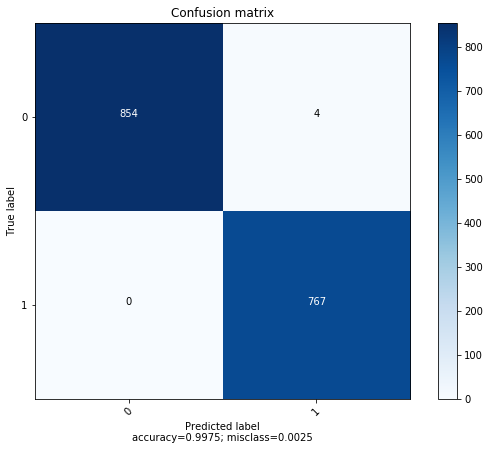

In [153]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import matplotlib.pyplot as plt

labels=['0','1']
cnf_matrix=confusion_matrix(test_y,predict_y)
plt.figure()
plot_confusion_matrix(cnf_matrix,target_names=labels,normalize=False)